## ***Uncertainty Quantification***

Prof. Dr. M. Frank 2021

------------------------------------------------------------------------

#### **EXERCISE SHEET 5**

In [2]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import math
import scipy.linalg
import scipy.special

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   

**EXERCISE 1)**

Consider the ODE with uncertain parameter and uncertain initial condition

\begin{equation*}
\frac{du}{dt}(t,Z) = -\alpha(Z)u(t,Z),\quad u(0,Z) = \beta(Z).
\end{equation*}

(a) Expand the random variables $\alpha$ and $\beta$ in terms of gPC Hermite polynomials $H_i$. 

(b) Derive the stochastic Galerkin system by expanding the solution in terms of $H_i$ and testing with $H_k$.

(c) How can you obtain the expectation and the variance of the solution $u(t,Z)$?

(d) Assume that $\beta$ is Gaussian normal distributed and $\alpha$ is deterministic (independent of $Z$). How does the Galerkin system look like? Can you say something about the distribution of $u(t,Z)$?

(e) Assume that $\alpha$ is Gaussian normal distributed and $\beta$ is deterministic (independent of $Z$). How does the Galerkin system look like? Can you say something about the distribution of $u(t,Z)$?


**EXERCISE 2)**

Recall the ODE with uncertainties from the last exercise:

\begin{equation*}
\frac{du}{dt}(t,Z) = -\alpha(Z)u(t,Z),\quad u(0,Z) = \beta(Z).
\end{equation*}

Assume that $\alpha$ is Gaussian normal distributed and $\beta$ is deterministic (independent of Z).

(a) Derive and solve the Stochastic Galerkin system numerically. Fill in the gaps below to plot the expectation value and variance of $u(t,Z)$ as a function of the gPC approximation order $N$. What do you observe when you increase the time $t$?

*Hint*: For Hermite polynomials, $E[H_k^2]=k!$ and $$E[H_iH_jH_k] = e_{ijk} = \frac{i!j!k!}{(s-i)!(s-j)!(s-k)!}$$ for $2s := i+j+k$ even and $s \geq i,j,k$ 

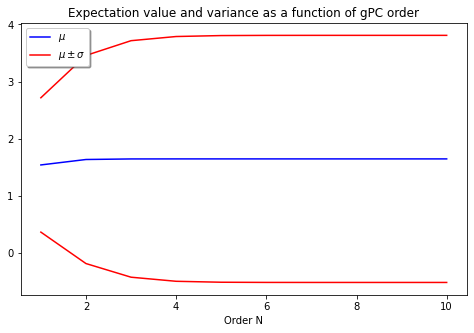

In [2]:
## Function definitions ## 

def CoeffsAlpha(N):
  mu = 0
  sigma = 1
  a = np.zeros((N+1,1))
  a[0]=mu
  a[1]=sigma
  return a

def CoeffsBeta(N):
  mu=1
  b = np.zeros((N+1,1))
  b[0]=mu
  return b

def epsilon(i,j,k):
  y=0
  if ((i+j+k)%2)==0:
    s=(i+j+k)/2
    if (s>=i and s>=j and s>=k):
      y = math.factorial(i)*math.factorial(j)*math.factorial(k)/math.factorial(s-i)/math.factorial(s-j)/math.factorial(s-k)
  return y

def gamma(k):
  return math.factorial(k)


CoeffsAlpha=np.vectorize(CoeffsAlpha)
CoeffsBeta=np.vectorize(CoeffsBeta)
epsilon=np.vectorize(epsilon)
gamma=np.vectorize(gamma)

##  Compute Expectation and Standard deviation ##

#gPC order
Nmax=10
#Time
t=1

Expectation = np.empty((Nmax,))
StdDev = np.empty((Nmax,))

#Plot for different order
for N in range(1,Nmax+1):
  #Assemble SG matrix
  a = CoeffsAlpha(N)
  A = np.zeros((N+1,N+1))

  for j in range(N+1):
    for k in range(N+1):
      A[j,k]=0
      for i in range(N+1):
        A[j,k] = A[j,k] - 1/gamma(k)*a[i]*epsilon(i,j,k)
  
  b = CoeffsBeta(N)
  u = np.dot(scipy.linalg.expm(t*A.transpose()),b)

#Fill in formulas for expectation value and standard deviation <--TO DO
  Expectation[N-1] = u[0]
  StdDev[N-1] = np.sqrt(np.sum(np.multiply(gamma(np.arange(1,N+1)).transpose(),u[1:N+1].transpose()**2)))

plt.figure(figsize=(8,5))
plt.plot(np.arange(1,Nmax+1),Expectation,color='blue',label=r'$\mu$')
plt.plot(np.arange(1,Nmax+1),Expectation+StdDev,color='red',label=r'$\mu \pm \sigma$')
plt.plot(np.arange(1,Nmax+1),Expectation-StdDev,color='red')
plt.title("Expectation value and variance as a function of gPC order")
plt.xlabel("Order N")
_=plt.legend(shadow=True, fancybox=True)

(b) Select a grid in $Z$ and derive a reconstruction of $u(t,Z)$ by interpolation. What do you obtain for the derived quantities like the expectation value? Solve the Stochastic Collocation system numerically. (Fill in the gaps or adjust the code below according to your choices/derivations)

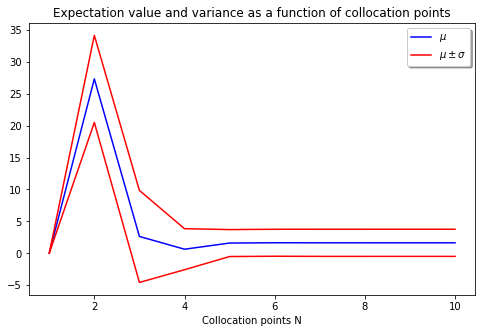

In [3]:
#Normal distribution
def f(x,mu,sigma):
  return 1/np.sqrt(2*math.pi)*np.exp(-(x-mu)**2/2/sigma)

#ODE parameters
t=1.0
beta=1.0

#Quadrature tolerance 
QuadTol = 1e-10

#Gaussian parameters
mu=0.0
sigma=1

#Grid
Nmax=10
alphal=mu-4*sigma
alphar=mu+4*sigma

Expectation = np.zeros((Nmax,))
StdDev = np.zeros((Nmax,))

for N in range(1,Nmax+1):
  alpha = np.linspace(alphar,alphal,N)    #Swap upper and lower bound, so that upper bound is chosen for N=1
  #Fill in Solution<--TO DO
  y = beta * np.exp(-alpha*t)
 
  #Fill in Interpolation<--TO DO
  p = np.polyfit(alpha,y,np.size(alpha)-1)
  
  #Expectation
  def fun_exp(x):
    return np.multiply(np.polyval(p,x),f(x,mu,sigma))
  Expectation[N-1],_ = integrate.quadrature(fun_exp,alphal,alphar,tol=QuadTol)
  #Variance
  def fun_var(x):
    return np.multiply((np.polyval(p,x) - Expectation[N-1])**2,f(x,mu,sigma))
  StdDev[N-1],_ = np.sqrt(integrate.quadrature(fun_var,alphal,alphar,tol=QuadTol))
    
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,Nmax+1),Expectation,color='blue',label=r'$\mu$')
plt.plot(np.arange(1,Nmax+1),Expectation+StdDev,color='red',label=r'$\mu \pm \sigma$')
plt.plot(np.arange(1,Nmax+1),Expectation-StdDev,color='red')
plt.title("Expectation value and variance as a function of collocation points")
plt.xlabel("Collocation points N")
_=plt.legend(shadow=True, fancybox=True)

(c) Compare, also with Monte-Carlo sampling. 

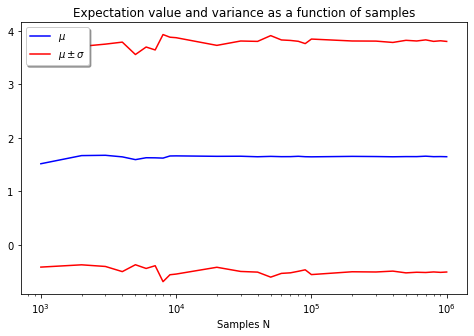

In [4]:
#Function definitions
#Sampling <--TO DO
def InverseTransformSampling(N,mu,sigma):
  y = np.random.uniform(0,1,N)
  return Finv(y,mu,sigma)

#Inverse distribution function <--TO DO
def Finv(y,mu,sigma):
  return mu + np.sqrt(2)*sigma*scipy.special.erfinv(2*y-1)

#Averaging
def avg(x):
  return 0.5*(x[1:]+x[0:np.size(x)])

#ODE parameters 
t=1.0
beta=1.0
#Samples
N=np.hstack((np.arange(1e3,1e4+1,1e3),np.arange(2e4,1e5+1,1e4),np.arange(2e5,1e6+1,1e5)))
#Gaussian parameters
mu=0.0
sigma=1

Expectation=np.empty((np.size(N),))
StdDev=np.empty((np.size(N),))

for i in range(np.size(N)):
  #Sample
  alpha = InverseTransformSampling(int(N[i]),mu,sigma)
  #Result
  y = beta * np.exp(-alpha*t)
  Expectation[i] = 1/N[i]*np.sum(y)
  StdDev[i]=np.sqrt(1/(N[i]-1)*np.sum((y-Expectation[i])**2))


plt.figure(figsize=(8,5))
plt.semilogx(N,Expectation,color='blue',label=r'$\mu$')
plt.semilogx(N,Expectation-StdDev,color='red',label=r'$\mu \pm \sigma$')
plt.semilogx(N,Expectation+StdDev,color='red')
plt.title("Expectation value and variance as a function of samples")
plt.xlabel("Samples N")
_=plt.legend(shadow=True, fancybox=True)


**EXERCISE 4)**

Consider the code block below. 

(a) The code implements a simple example of gPC approximation. Which one? 

(b) How would you evaluate the quality of the approximation for the probability density function and cumulative density function?

(c) What can you observe for different orders of approximation?

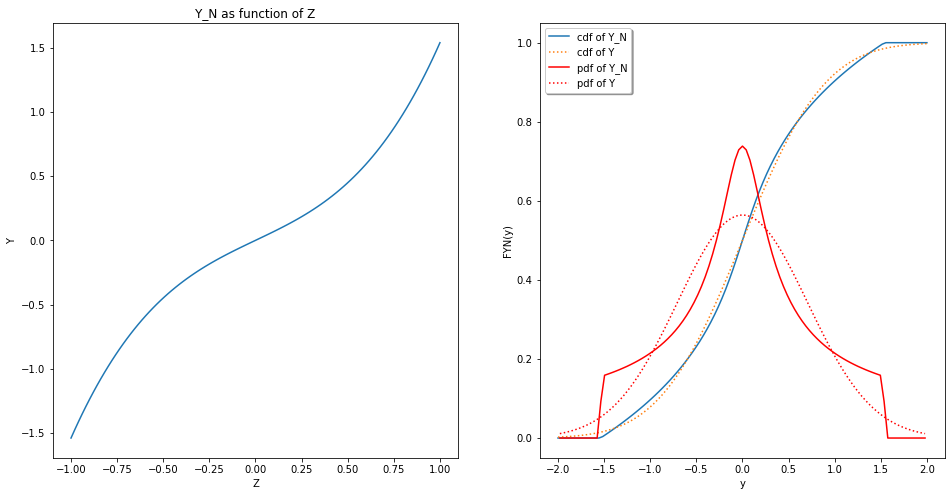

In [4]:
def legendre(n,X) :
  res = []
  for m in range(n+1):
    res.append(scipy.special.lpmv(m,n,X))
  res =np.array(res)
  if res.ndim==1:
    res=np.expand_dims(res,axis=1)
  return res

def Pn(n,x):
  if n == 0:
      return  1
  elif n==1:
      return  x
  elif n>1:
      return  (2*n-1)/n * x * P(n-1,x) - (n-1)/n * P(n-2,x)

Pn = np.vectorize(Pn)

#Evaluate gPC approximation
def YN(z,N,gamma,alpha):
  y=0
  for k in range(N+1):
    y = y + alpha[k]/gamma[k]*phi(k,z) #Assemble polynomial
  return y

#Inverse distribution for Y
def FYinv(y):
  return scipy.special.erfinv(2*y-1) #Gaussian

#Distribution for Y
def FY(y):
  return 1/2*(1+scipy.special.erf(y)) #Gaussian

def fY(y):
  return 1/np.sqrt(math.pi)*np.exp(-y**2) #Gaussian

#Distribution for Z
def FZ(z):
  return (z+1)/2 #Uniform/Legendre

#Density for Z
def fZ(z):
  return 1/2*(z>=-1 and z<=1) #Uniform/Legendre

#Compute orthogonal polynomials
def phi(n,x):
  P = legendre(n,x)
  return P[0,:]

#Averaging
def avg(x):
  return 0.5*(x[1:]+x[0:np.size(x)-1])

fZ = np.vectorize(fZ)

#Integration tolerance
QuadTol = 1e-10

#Order of approximation
N=3

#Domain of support and plot parameters
#gPC reconstruction
z0 = -1
z1 = 1
nz = 100
z = np.linspace(z0,z1,nz)
#pdf of gPC reconstruction
y0 = -2 
y1 = 2
ny = 100
y = np.linspace(y0,y1,ny)
dy = (y1-y0)/ny

gamma = np.empty((N+1,))
alpha = np.empty((N+1,))

#Compute coefficients
for k in range(N+1):
  def f1(z):
    return np.multiply(phi(k,z)**2,fZ(z))
  def f2(z):
    return np.multiply(FYinv(FZ(z)),np.multiply(phi(k,z),fZ(z)))
  gamma[k],_ = integrate.quad_vec(f1,z0,z1,epsabs=QuadTol)
  alpha[k],_ = integrate.quad_vec(f2,z0,z1,epsabs=QuadTol)

#Plot gPC reconstruction
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ax[0].plot(z,YN(z,N,gamma,alpha))
ax[0].set_xlabel('Z')
ax[0].set_ylabel('Y')
ax[0].set_title('Y_N as function of Z')

#Determine pdf of gPC reconstruction
FYN = np.empty((ny,))
for i in range(np.size(y)):
  def f3(z):
   return np.multiply((YN(z,N,gamma,alpha)<=y[i]),fZ(z))
  FYN[i],_ = integrate.quad_vec(f3,z0,z1,epsabs=QuadTol)

ax[1].plot(y,FYN,label='cdf of Y_N')
ax[1].set_xlabel('y')
ax[1].set_ylabel('FYN(y)')
ax[1].plot(y,FY(y),linestyle='dotted',label='cdf of Y')
ax[1].plot(avg(y),np.diff(FYN)/dy,color='red',label='pdf of Y_N')
ax[1].plot(avg(y),fY(avg(y)),linestyle='dotted',color='red',label='pdf of Y')
_=ax[1].legend(shadow=True, fancybox=True)

&nbsp;

**EXERCISE 4)**

Reproduce and possibly extend the results in either of the following papers (you can also use a paper of your choice):

- R. Pulch, *Stochastic Galerkin methods for analyzing equilibria of random dynamical systems,* SIAM/ASA J. Uncertainty Quantification 1(1), 408-430 (2013).
- R. Pulch and D. Xiu, *Generalised polynomial chaos for a class of linear conservation laws,* J. Sci. Comput. 51(2), 293-312 (2012).
- D. Gottlieb and D. Xiu, *Galerkin Method for Wave Equations with Uncertain Coefficients,* Comm. Comput. Phys. 3(2), 505-518 (2008). 
- D. Xiu and G.E. Karniadakis, *Supersensitivity Due to Uncertain Boundary Conditions,* Int. J. Numer. Meth. Engng. 61(12), 2114-2138 (2004).
- D. Xiu and G.E. Karniadakis, *Modeling Uncertainty in Steady State Diffusion Problems via Generalized Polynomial Chaos,* Comput. Methods Appl. Mech. Engrg. 191, 4927-4948 (2002). 

&nbsp;

All papers can be found in ILIAS or via internet search.
Use the following general strategy:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;(a) Implement an efficient solver for the deterministic problem.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;(b) Implement Monte-Carlo sampling. (Possibly keep it running in the background) Also try quasi-MC or MLMC.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;(c) Implement a tensorized quadrature method.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;(d) Reproduce the derivation of the stochastic Galerkin system. Implement a solver following the guidelines in each of the papers.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;(e) Compare and discuss.


